## Generalidades del notebook
<ul>
    <li>
    <b>Proyecto:</b> Predicción de accidentes cerebrovasculares
    </li> 
    <li>
    <b>Objetivo del notebook:</b> Preparación de datos y modelo de prediccón
    </li> 
    <li>
    <b>Autores:</b> 
        <ul>
            <li>Augusto Trilleras Motta</li>
            <li>Lizeth Rodriguez Ramos</li>
        </ul>
    </li>
    <li>
    <b>Fecha:</b> Abril, 2023
    </li>
</ul>    

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **Exploracion de los Datos**
<p>
La base de datos <a href='https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset'>healthcare-dataset-stroke</a> se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.
</p>

#### Parámetros
<ul>
    <li>
        <b>id:</b> Identificador único
    </li>    
    <li>    
        <b>gender:</b> "Masculino", "Femenino" u "Otro"
    </li>    
    <li>    
        <b>age:</b> Edad del paciente
    </li>    
    <li>    
        <b>hypertension:</b> 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
    </li>    
    <li>    
        <b>heart_disease:</b> 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
    </li>    
    <li>    
        <b>ever_married:</b> "No" o "Sí"
    </li>    
    <li>    
        <b>work_type:</b> "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    </li>    
    <li>    
        <b>Residence_type:</b> "Rural" o "Urban"
    </li>    
    <li>    
        <b>avg_glucose_level:</b> Nivel promedio de glucosa en sangre
    </li>    
    <li>    
        <b>bmi:</b> Índice de masa corporal
    </li>    
    <li> 
        <b>smoking_status:</b> "formerly smoked", "never smoked", "smokes" or "Unknown"
    </li>
    <li> 
        <b>stroke:</b> 1 si el paciente tuvo un accidente cerebrovascular o 0 en caso contrario
    </li>
</ul>


In [213]:
df = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [214]:
# nombres de las columnas
print(f'Columnas y dimensiones: {df.columns}, {df.shape}')

Columnas y dimensiones: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object'), (5110, 12)


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [216]:
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df = df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [218]:
outlier = ['avg_glucose_level', 'bmi']

Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


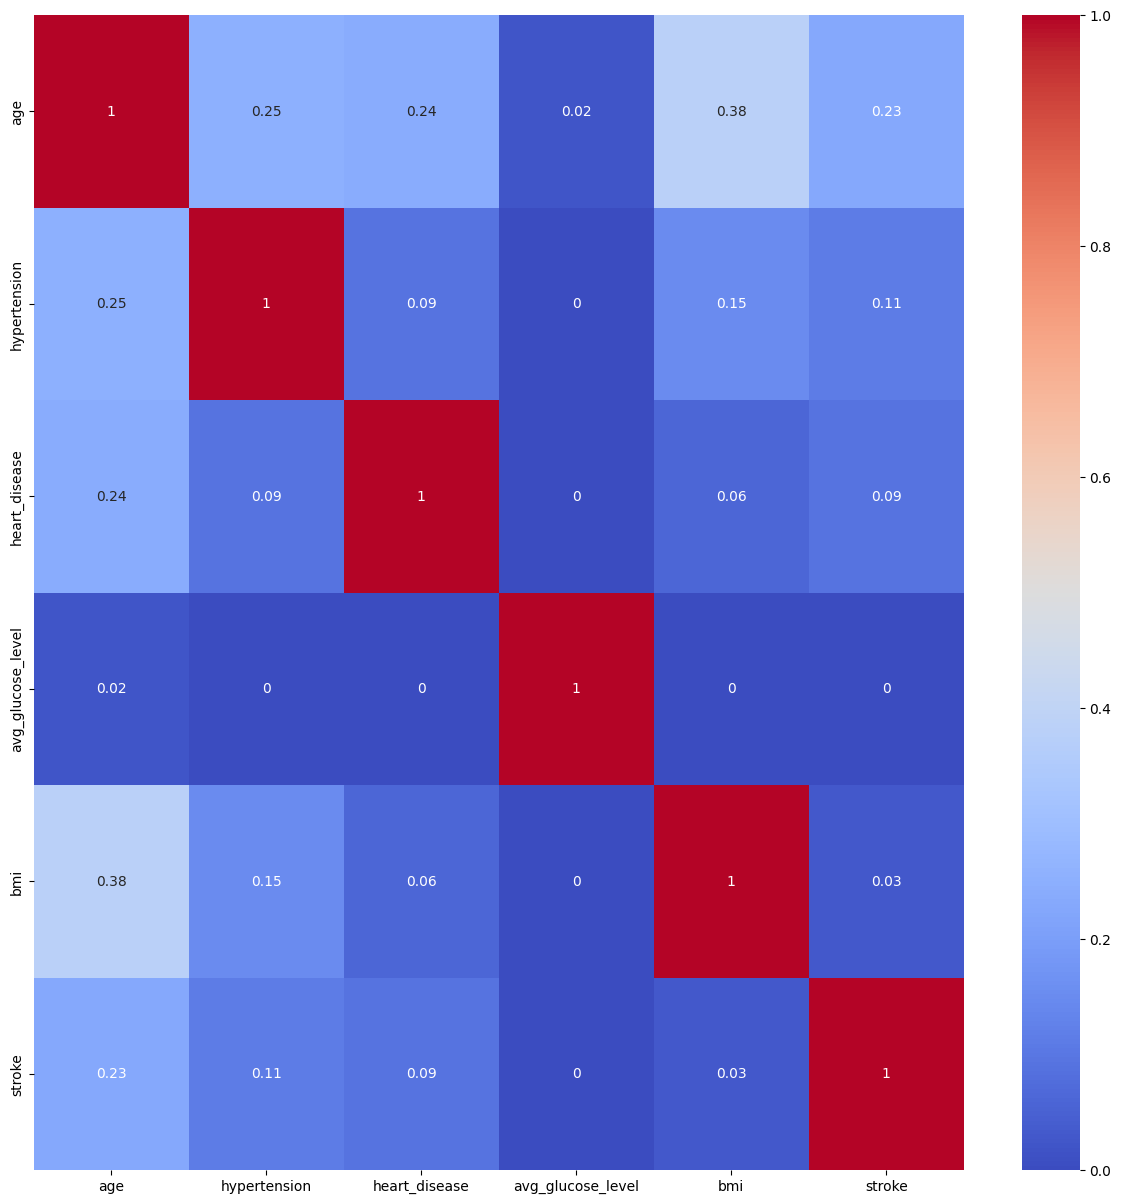

In [219]:
corr = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(round(corr,2).abs(), annot=True, cmap="coolwarm", ax=ax); 

In [220]:
#	bmi	smoking_status	stroke
print(
    f'''
    Genero: {df['gender'].unique().tolist()}
    Casado: {df['ever_married'].unique().tolist()}
    Tipo de trabajo: {df['work_type'].unique().tolist()}
    Tipo de residencia: {df['Residence_type'].unique().tolist()}
    Estado de fumador: {df['smoking_status'].unique().tolist()}
    '''
)


    Genero: ['Male', 'Female', 'Other']
    Casado: ['Yes', 'No']
    Tipo de trabajo: ['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked']
    Tipo de residencia: ['Rural', 'Urban']
    Estado de fumador: ['never smoked', 'Unknown', 'smokes', 'formerly smoked']
    


In [221]:
# df.gender = df.gender.astype("category").cat.codes
# df.ever_married = df.ever_married.astype("category").cat.codes
# df.work_type = df.work_type.astype("category").cat.codes
# df.Residence_type = df.Residence_type.astype("category").cat.codes
# df.smoking_status = df.smoking_status.astype("category").cat.codes

# df.head()

<ul>
    <li>
        <b>Género:</b> 
        0 Male | 1 Female | 2 Other
    </li> 
    <li>
        <b>Casado:</b> 
        0 No | 1 Yes
    </li>     
    <li>
        <b>Tipo de trabajo:</b> 
        0 Children | 1 Never_worked | 2 Private | 3 Self-employed | 4 Govt_job 
    </li>  
    <li>
        <b>Tipo de residencia:</b> 
        0 Rural | 1 Urban
    </li>  
    <li>
        <b>Estado de fumador:</b> 
        0 Unknown | 1 formerly smoked | 2 never smoked | 3 smokes
    </li>  
</ul>


In [222]:
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 2 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4391 non-null   float64
 1   hypertension                    4391 non-null   int64  
 2   heart_disease                   4391 non-null   int64  
 3   avg_glucose_level               4391 non-null   float64
 4   bmi                             4391 non-null   float64
 5   stroke                          4391 non-null   int64  
 6   gender_Female                   4391 non-null   uint8  
 7   gender_Male                     4391 non-null   uint8  
 8   gender_Other                    4391 non-null   uint8  
 9   ever_married_No                 4391 non-null   uint8  
 10  ever_married_Yes                4391 non-null   uint8  
 11  work_type_Govt_job              4391 non-null   uint8  
 12  work_type_Never_worked          43

<Figure size 700x400 with 0 Axes>

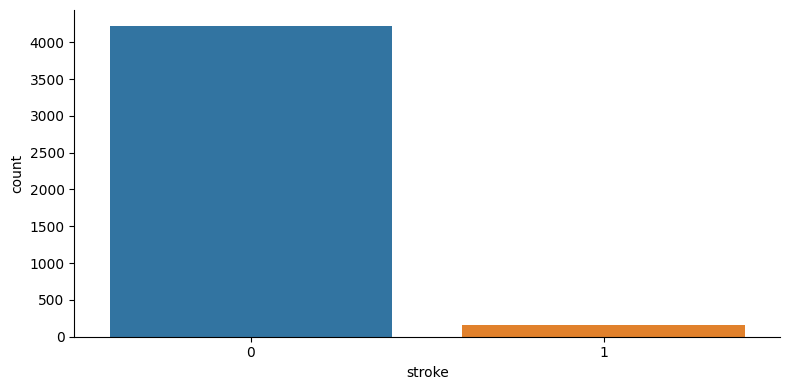

In [224]:
plt.figure(figsize=(7,4))
sns.catplot(data=df, kind='count', x='stroke', height=4, aspect=2)

<AxesSubplot: xlabel='stroke', ylabel='stroke'>

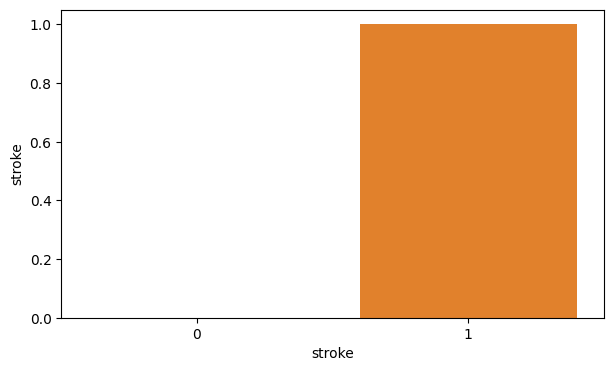

In [225]:
plt.figure(figsize=(7,4))
sns.barplot(data = df, x = "stroke", y = "stroke")

## **Modelos**

### Sin SMOTE

In [226]:
X = df.drop(['stroke'], axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X))
y = df.stroke

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [227]:
def ModeloPrediccion(y_test, y_pred):
    
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1}')
    
    performance_metrics = [accuracy,precision,recall,f1]
    
    return performance_metrics 

In [228]:
def confus_matrix(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots(figsize=(3,3))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    # plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

##### a. Regresión logística

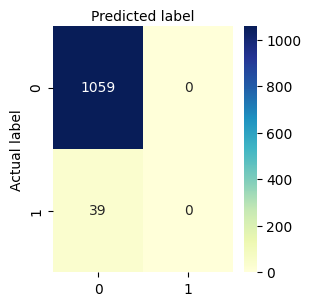

In [229]:
logisticRModel = LogisticRegression(random_state=0)
logisticRModel.fit(x_train, y_train)
y_pred = logisticRModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [230]:
logistic_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_LR_0 = ModeloPrediccion(y_test, y_pred)
fit_LR_0 = logisticRModel
pd.DataFrame(logistic_report).transpose()

Accuracy: 0.964
Precision: 0.0
Recall: 0.0
F1_score: 0.0


,precision,recall,f1-score,support
No Stroke,0.964481,1.000000,0.981919,1059.000000
Stroke,0.000000,0.000000,0.000000,39.000000
accuracy,0.964481,0.964481,0.964481,0.964481
macro avg,0.482240,0.500000,0.490960,1098.000000
weighted avg,0.930223,0.964481,0.947042,1098.000000


##### b. K-Neighbors

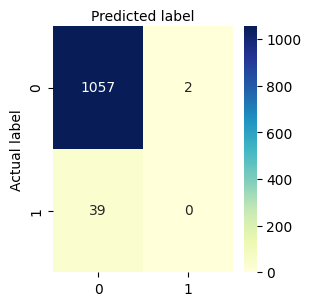

In [231]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=2)
KNeighborsModel.fit(x_train, y_train)
y_pred = KNeighborsModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [232]:
KNeighbors_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_KNN_0 = ModeloPrediccion(y_test, y_pred)
fit_KNN_0 = KNeighborsModel
pd.DataFrame(KNeighbors_report).transpose()

Accuracy: 0.963
Precision: 0.0
Recall: 0.0
F1_score: 0.0


,precision,recall,f1-score,support
No Stroke,0.964416,0.998111,0.980974,1059.000000
Stroke,0.000000,0.000000,0.000000,39.000000
accuracy,0.962659,0.962659,0.962659,0.962659
macro avg,0.482208,0.499056,0.490487,1098.000000
weighted avg,0.930161,0.962659,0.946131,1098.000000


##### c. RandomForestClassifier

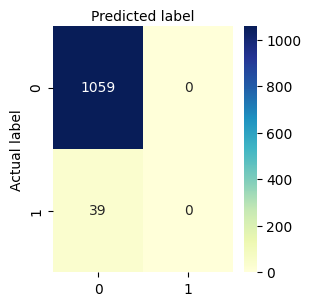

In [233]:
RandomForestModel = RandomForestClassifier(max_depth=6, random_state=0)
RandomForestModel.fit(x_train, y_train)
y_pred = RandomForestModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [234]:
RandomForest_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_RF_0 = ModeloPrediccion(y_test, y_pred)
fit_RF_0 = RandomForestModel
pd.DataFrame(RandomForest_report).transpose()

Accuracy: 0.964
Precision: 0.0
Recall: 0.0
F1_score: 0.0


,precision,recall,f1-score,support
No Stroke,0.964481,1.000000,0.981919,1059.000000
Stroke,0.000000,0.000000,0.000000,39.000000
accuracy,0.964481,0.964481,0.964481,0.964481
macro avg,0.482240,0.500000,0.490960,1098.000000
weighted avg,0.930223,0.964481,0.947042,1098.000000


##### d. SVM

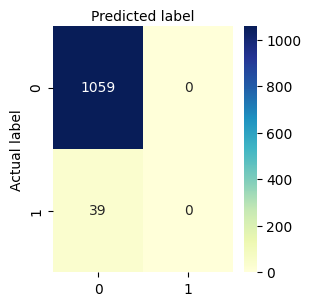

In [235]:
svmModel = SVC(gamma='auto')
svmModel.fit(x_train, y_train)
y_pred = svmModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [236]:
svm_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_SVM_0 = ModeloPrediccion(y_test, y_pred)
fit_SVM_0 = svmModel
pd.DataFrame(svm_report).transpose()

Accuracy: 0.964
Precision: 0.0
Recall: 0.0
F1_score: 0.0


,precision,recall,f1-score,support
No Stroke,0.964481,1.000000,0.981919,1059.000000
Stroke,0.000000,0.000000,0.000000,39.000000
accuracy,0.964481,0.964481,0.964481,0.964481
macro avg,0.482240,0.500000,0.490960,1098.000000
weighted avg,0.930223,0.964481,0.947042,1098.000000


In [237]:
def Rendimiento(models,metrics):
    # Generación de gráfica con métricas de rendimiento
    plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)
    x = np.arange(len(models))
    metrics = metrics.reshape(len(models), round(len(metrics)/len(models)))
    
    plt.bar(x, metrics[:,0], align='center', width = 0.15, alpha=0.7, color = 'blue', label= 'Accuracy')
    plt.bar(x+0.15, metrics[:,1], align='center', width = 0.15, alpha=0.7, color = 'red', label= 'Precision')
    plt.bar(x+0.30, metrics[:,2], align='center', width = 0.15, alpha=0.7, color = 'green', label= 'Recall')
    plt.bar(x+0.45, metrics[:,3], align='center', width = 0.15, alpha=0.7, color = 'black', label= 'F1_score')
    
    plt.xticks(x, models)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylabel('Score')
    plt.title('Performance Metrics for Different Models')    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    plt.show()    
    
    # Generación de reporte con métricas de rendimiento
    metrics = pd.DataFrame.from_dict(metrics)
    metrics.rename(columns={0: 'Accuracy', 
                            1: 'Precision',
                            2: 'Recall',
                            3: 'F1_score'}, inplace=True)
    #metrics.to_excel('metricas.xlsx')    
    
    return metrics

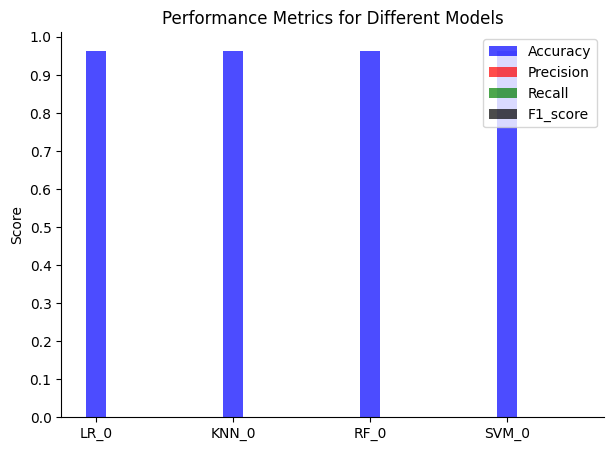

,Accuracy,Precision,Recall,F1_score
0,0.964,0.0,0.0,0.0
1,0.963,0.0,0.0,0.0
2,0.964,0.0,0.0,0.0
3,0.964,0.0,0.0,0.0


In [238]:
modelos = ['LR_0', 'KNN_0', 'RF_0', 'SVM_0']
metricas = np.concatenate((metrics_LR_0, metrics_KNN_0, metrics_RF_0, metrics_SVM_0))
consolidado_metricas = Rendimiento(modelos,metricas)
consolidado_metricas

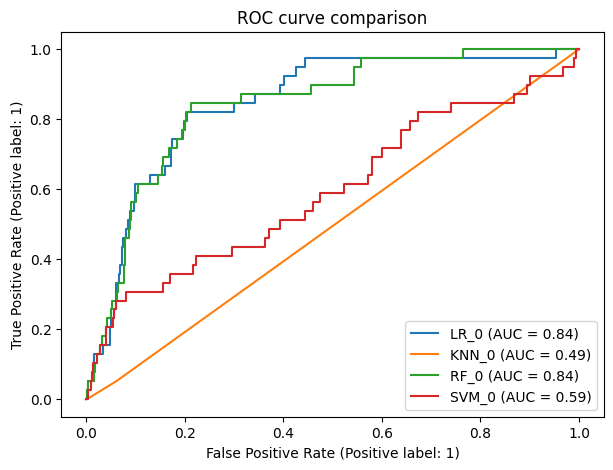

In [239]:
fig, axf = plt.subplots(figsize=(7,5))   
disp_0 = RocCurveDisplay.from_estimator(fit_LR_0, x_test, y_test, ax=axf, name='LR_0')
disp_1 = RocCurveDisplay.from_estimator(fit_KNN_0, x_test, y_test, ax=axf, name='KNN_0')
disp_2 = RocCurveDisplay.from_estimator(fit_RF_0, x_test, y_test, ax=axf, name='RF_0')
disp_3 = RocCurveDisplay.from_estimator(fit_SVM_0, x_test, y_test, ax=axf, name='SVM_0')
plt.title("ROC curve comparison")
plt.show()

### SMOTE

In [240]:
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=100)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

##### a. Regresión logística

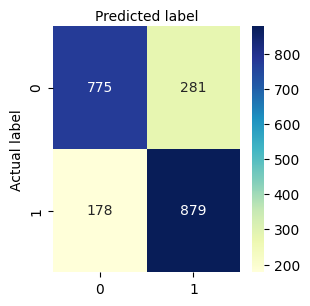

In [241]:
logisticRModel = LogisticRegression(random_state=0)
logisticRModel.fit(x_train, y_train)
y_pred = logisticRModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [242]:
logistic_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_LR_1 = ModeloPrediccion(y_test, y_pred)
fit_LR_1 = logisticRModel
pd.DataFrame(logistic_report).transpose()

Accuracy: 0.783
Precision: 0.758
Recall: 0.832
F1_score: 0.793


,precision,recall,f1-score,support
No Stroke,0.813221,0.733902,0.771528,1056.000000
Stroke,0.757759,0.831599,0.792963,1057.000000
accuracy,0.782773,0.782773,0.782773,0.782773
macro avg,0.785490,0.782750,0.782246,2113.000000
weighted avg,0.785477,0.782773,0.782251,2113.000000


##### b. K-Neighbors

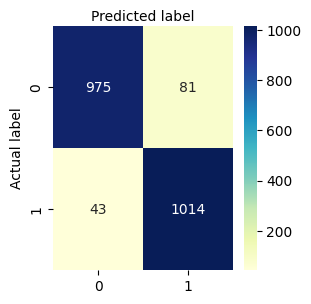

In [243]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=2)
KNeighborsModel.fit(x_train, y_train)
y_pred = KNeighborsModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [244]:
KNeighbors_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_KNN_1 = ModeloPrediccion(y_test, y_pred)
fit_KNN_1 = KNeighborsModel
pd.DataFrame(KNeighbors_report).transpose()

Accuracy: 0.941
Precision: 0.926
Recall: 0.959
F1_score: 0.942


,precision,recall,f1-score,support
No Stroke,0.957760,0.923295,0.940212,1056.000000
Stroke,0.926027,0.959319,0.942379,1057.000000
accuracy,0.941316,0.941316,0.941316,0.941316
macro avg,0.941894,0.941307,0.941296,2113.000000
weighted avg,0.941886,0.941316,0.941296,2113.000000


##### c. RandomForestClassifier

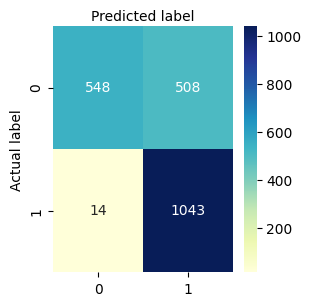

In [245]:
RandomForestModel = RandomForestClassifier(max_depth=6, random_state=0)
RandomForestModel.fit(x_train, y_train)
y_pred = RandomForestModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [246]:
RandomForest_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_RF_1 = ModeloPrediccion(y_test, y_pred)
fit_RF_1 = RandomForestModel
pd.DataFrame(RandomForest_report).transpose()

Accuracy: 0.753
Precision: 0.672
Recall: 0.987
F1_score: 0.8


,precision,recall,f1-score,support
No Stroke,0.975089,0.518939,0.677379,1056.000000
Stroke,0.672469,0.986755,0.799847,1057.000000
accuracy,0.752958,0.752958,0.752958,0.752958
macro avg,0.823779,0.752847,0.738613,2113.000000
weighted avg,0.823708,0.752958,0.738642,2113.000000


##### d. SVM

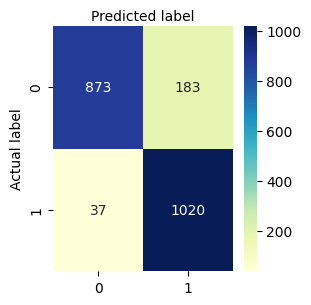

In [247]:
svmModel = SVC(gamma='auto')
svmModel.fit(x_train, y_train)
y_pred = svmModel.predict(x_test)
confus_matrix(y_test, y_pred)

In [248]:
svm_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
metrics_SVM_1 = ModeloPrediccion(y_test, y_pred)
fit_SVM_1 = RandomForestModel
pd.DataFrame(svm_report).transpose()

Accuracy: 0.896
Precision: 0.848
Recall: 0.965
F1_score: 0.903


,precision,recall,f1-score,support
No Stroke,0.959341,0.826705,0.888098,1056.000000
Stroke,0.847880,0.964995,0.902655,1057.000000
accuracy,0.895883,0.895883,0.895883,0.895883
macro avg,0.903610,0.895850,0.895376,2113.000000
weighted avg,0.903584,0.895883,0.895380,2113.000000


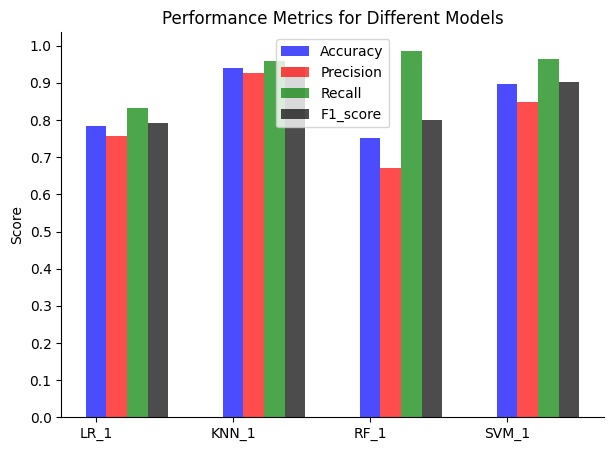

,Accuracy,Precision,Recall,F1_score
0,0.783,0.758,0.832,0.793
1,0.941,0.926,0.959,0.942
2,0.753,0.672,0.987,0.800
3,0.896,0.848,0.965,0.903


In [249]:
modelos = ['LR_1', 'KNN_1', 'RF_1', 'SVM_1']
metricas = np.concatenate((metrics_LR_1, metrics_KNN_1, metrics_RF_1, metrics_SVM_1))
consolidado_metricas = Rendimiento(modelos,metricas)
consolidado_metricas

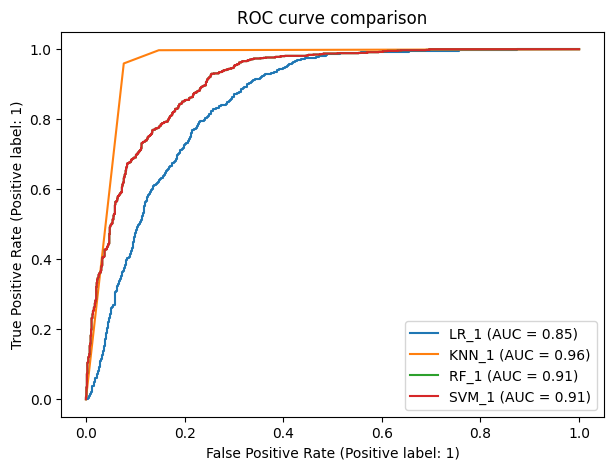

In [250]:
fig, axf = plt.subplots(figsize=(7,5))   
disp_0 = RocCurveDisplay.from_estimator(fit_LR_1, x_test, y_test, ax=axf, name='LR_1')
disp_1 = RocCurveDisplay.from_estimator(fit_KNN_1, x_test, y_test, ax=axf, name='KNN_1')
disp_2 = RocCurveDisplay.from_estimator(fit_RF_1, x_test, y_test, ax=axf, name='RF_1')
disp_3 = RocCurveDisplay.from_estimator(fit_SVM_1, x_test, y_test, ax=axf, name='SVM_1')
plt.title("ROC curve comparison")
plt.show()